In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('insurance.csv')

In [5]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
df['sex'] = df['sex'].astype('category')
df['sex'] = df['sex'].cat.codes

In [12]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [14]:
df['smoker'] = df['smoker'].astype('category')
df['smoker'] = df['smoker'].cat.codes

df['region'] = df['region'].astype('category')
df['region'] = df['region'].cat.codes

In [15]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,3,16884.92400
1,18,1,33.770,1,1,2,1725.55230
2,28,1,33.000,3,1,2,4449.46200
3,33,1,22.705,0,1,1,21984.47061
4,32,1,28.880,0,1,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,1,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [17]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

we will predict charges(label) using all columns(features)

In [19]:
X = df.drop(columns = 'charges')
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,0,3
1,18,1,33.770,1,1,2
2,28,1,33.000,3,1,2
3,33,1,22.705,0,1,1
4,32,1,28.880,0,1,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,1,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [24]:
y = df['charges']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [26]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [27]:
lr.fit(X_train, y_train)

LinearRegression()

In [28]:
c = lr.intercept_
c

-4904.348645421116

In [29]:
m = lr.coef_
m

array([ 217.77609861,  580.15665059,  295.74803747,  589.5480484 ,
        580.15665059, -487.96883521])

In [30]:
y_pred_train = lr.predict(X_train)

In [31]:
y_pred_train

array([ 7360.15200667, 11825.54832356, 22218.03180536, 12000.53652759,
       12253.46554006,  6582.78223903,  8354.28213025, 19570.60136149,
       14308.67096728, 20266.04139383, 15103.69888071, 15413.11645123,
       18501.3400737 , 11643.80816858, 16218.28940635,  9027.42917835,
       19293.84299135, 10361.25282733,  9821.96339291, 10900.25601517,
       18299.68826647, 14040.86410976, 14091.7425433 , 14365.18393784,
       10808.43451504,  8389.49702775,  9108.66748085, 19632.6128785 ,
       12829.43361463, 16211.08101318, 13779.60282365,  8621.51079426,
       19999.01960152, 11776.90331645, 11281.29749863,  9287.96875902,
       14076.12259003, 15249.69857645,  9931.15216465,  7002.66103034,
       10250.95605663,  9211.04371943, 12906.08712799, 18949.91425696,
        7311.38443371, 17286.97924471, 20046.75303093,  8031.4687698 ,
        8715.85631781, 14170.58296927, 14202.02237766, 14999.82291859,
       20719.03305646,  8743.58549837,  6437.59083368,  9056.16186422,
      

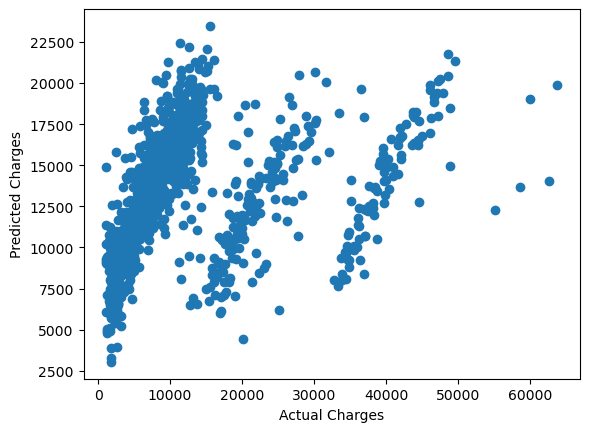

In [32]:
import matplotlib.pyplot as plt
plt.scatter(y_train, y_pred_train)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.show()

Check R2 Score _(closer to 0 is bad, closer to 1 is good)_ 

In [33]:
from sklearn.metrics import r2_score

In [34]:
r2_score(y_train, y_pred_train)

0.10804231118758745

In [35]:
y_pred_test = lr.predict(X_test)

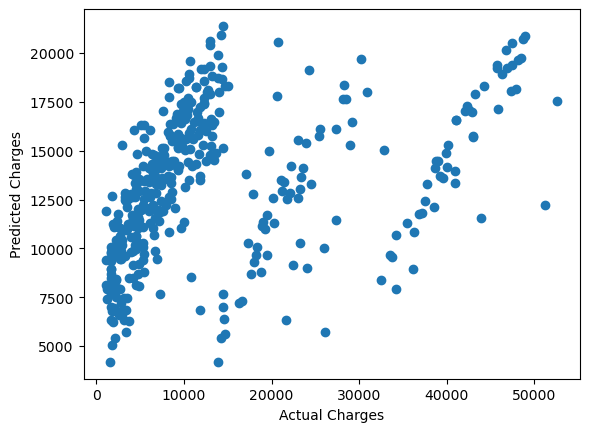

In [36]:
plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.show()

In [37]:
r2_score(y_test, y_pred_test)

0.15282161462326138